In [ ]:
#AFINN SA Used on data where users wrote 50-100 reviews

#AMD
#AFINN Sentiment Analysis of Yelp review text
#https://github.com/fnielsen/afinn/tree/master/afinn/data
#Use AFINN 165 with 3382 entries (compared to AFINN-111 with 2477 entries)
#http://darenr.github.io/afinn/ for browser based AFINN SA

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import sys

In [2]:
Yelp_subsample= pd.read_csv('reviews_users_50-100.csv')

In [10]:
#Create a dataframe with 300K randomly selected rows
Yelp_subsample.head()
# Yelp_subsample.count() # 3,636,641 text records total
# Yelp_100Krandom=Yelp_subsample.sample(n=100000)

,name,review_id,user_id,business_id,stars,text,date,review_count
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57


In [12]:
def get_afinn_scores(file="AFINN/AFINN-en-165.txt" or "AFINN/AFINN-emoticon-8.txt"): 
    afinn_file = open(file)
    scores = {}
    for line in afinn_file:
      term, score  = line.split("\t")
      scores[term] = int(score)
    return(scores)

In [13]:
import nltk
afinn_scores = get_afinn_scores()
yelp_text = Yelp_subsample['text'] # add str to avoid TypeError: expected string or bytes-like object

total =[]
score =[]
for review in yelp_text:
    review = str(review)
  #Tokenize the tweet
    words = nltk.word_tokenize(review)
  ## Get the total AFFIN score
    total_score = 0
    N = 0
    for w in words:
        if w.lower() in afinn_scores:
          total_score += afinn_scores[w.lower()]
          N += 1
#           print(total_score)
#     print('---')
    total.append(total_score)
    try:
        normalized_sentiment = (total_score/math.sqrt(N)) # based on # sentiment = float(sum(sentiments))/math.sqrt(len(sentiments))
    except ZeroDivisionError:
        normalized_sentiment = 0
    score.append(normalized_sentiment)
# se = pd.Series(score)
# Yelp_subsample['score']= se.values
# print(score)
#     print (total_score)
#     print(N)
#     print ('---')
#     print(normalized_sentiment)

  # Store the value
Yelp_subsample['sum_score'] = total
Yelp_subsample['norm_score'] = score

In [15]:
Yelp_subsample

,name,review_id,user_id,business_id,stars,text,date,review_count,sum_score,norm_score
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,22,7.778175
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,5,1.581139
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,23,6.147009
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,1,0.447214
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,18,4.992302
5,"""Yum Yum Sweet Shop""",r8ghBuwFFMybBGFcDVv6Ow,KgQnRvsPSrJJTOCp-reYZA,RaAF9t0_Epbov-1uHfDiXg,4,Step back in time and stay in the present all ...,2016-10-18,57,0,0.000000
6,"""Kintaro Sushi & Hot Pot""",PTldCrPlj6FbJnekNNQLDQ,KgQnRvsPSrJJTOCp-reYZA,PJ8VJqsTdJno0beARzaTrQ,4,I have been twice for lunch hotpot and dinner ...,2017-02-21,57,11,3.889087
7,"""PIZZAFIRE""",I1NMsaLQXLQRFEJwkx2eQA,KgQnRvsPSrJJTOCp-reYZA,5m_xSthxwPoR-XvJvtTeNQ,5,This restaurant grows their own herbs and lett...,2016-02-24,57,11,4.490731
8,"""Lemongrass Grill""",moFCqVwlzeUE4em5P0tynQ,KgQnRvsPSrJJTOCp-reYZA,06LmLcjFUb6b1HmhNllJZg,5,We will be back here really soon!\n\nOur servi...,2016-09-26,57,13,5.307228
9,"""Bowl Of Pho""",oEa4Csf_LjOQHiwRaYfuqg,KgQnRvsPSrJJTOCp-reYZA,zzSYBWuv_fXGtSgsO-6_1g,3,Came in due to recommendations and the large a...,2016-12-27,57,12,5.366563


In [16]:
Yelp_subsample.describe()

,stars,review_count,sum_score,norm_score
count,323310.000000,323310.000000,323310.000000,323310.000000
mean,3.712227,71.869240,13.634586,4.262965
std,1.131043,14.220856,12.624809,2.911558
min,1.000000,51.000000,-111.000000,-17.335288
25%,3.000000,59.000000,6.000000,2.645751
50%,4.000000,70.000000,12.000000,4.500000
75%,5.000000,83.000000,19.000000,6.123724
max,5.000000,100.000000,178.000000,19.398148


<function matplotlib.pyplot.colorbar>

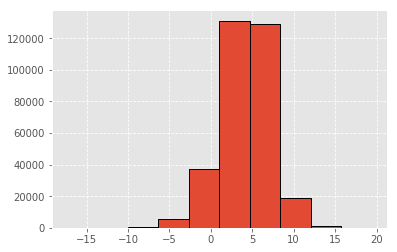

In [17]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_subsample['norm_score'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.colorbar

In [18]:
#Subdivide norm_scores into 5 bins
print(Yelp_subsample['norm_score'].quantile([0.2, 0.4, 0.6,0.8, 1]))

0.2     2.000000
0.4     3.794733
0.6     5.125693
0.8     6.609222
1.0    19.398148
Name: norm_score, dtype: float64


In [19]:
#Split data into 5 bins based on normalized score
bins = [-17.40, 2.00, 3.80, 5.13, 6.61, 19.40]
bin_stars = [1,2,3,4,5]
pd.cut(Yelp_subsample['norm_score'], bins, labels = bin_stars)
Yelp_subsample['bin_stars'] = pd.cut(Yelp_subsample['norm_score'], bins, labels=bin_stars)
Yelp_new_rating=Yelp_subsample
Yelp_new_rating.head()

,name,review_id,user_id,business_id,stars,text,date,review_count,sum_score,norm_score,bin_stars
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,22,7.778175,5
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,5,1.581139,1
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,23,6.147009,4
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,1,0.447214,1
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,18,4.992302,3


In [20]:
Yelp_new_rating.dtypes

name              object
review_id         object
user_id           object
business_id       object
stars              int64
text              object
date              object
review_count       int64
sum_score          int64
norm_score       float64
bin_stars       category
dtype: object

In [21]:
#Converting categories in bin_stars into integers in set_stars so that new bins can be plotted
#Delete extra columns
#Not sure why conversion to integers started at 0 so I added +1
Yelp_new_rating['set_stars']= pd.Categorical(Yelp_new_rating.bin_stars).codes + 1
Yelp_new_rating.head()

,name,review_id,user_id,business_id,stars,text,date,review_count,sum_score,norm_score,bin_stars,set_stars
0,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,22,7.778175,5,5
1,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,5,1.581139,1,1
2,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,23,6.147009,4,4
3,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,1,0.447214,1,1
4,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,18,4.992302,3,3


In [22]:
Yelp_new_rating.describe()

,stars,review_count,sum_score,norm_score,set_stars
count,323310.000000,323310.000000,323310.000000,323310.000000,323310.000000
mean,3.712227,71.869240,13.634586,4.262965,2.994606
std,1.131043,14.220856,12.624809,2.911558,1.416603
min,1.000000,51.000000,-111.000000,-17.335288,1.000000
25%,3.000000,59.000000,6.000000,2.645751,2.000000
50%,4.000000,70.000000,12.000000,4.500000,3.000000
75%,5.000000,83.000000,19.000000,6.123724,4.000000
max,5.000000,100.000000,178.000000,19.398148,5.000000


(0, 6)

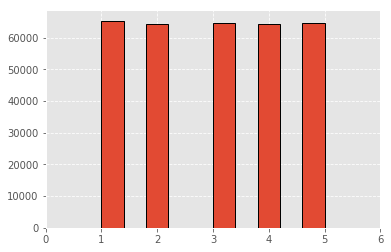

In [23]:
#Visualize distribution of norm_score
plt.style.use('ggplot')
plt.hist(Yelp_new_rating['set_stars'], edgecolor='black', linewidth=1)
plt.grid(True, ls = 'dashed')
plt.colorbar
plt.xlim(0,6)

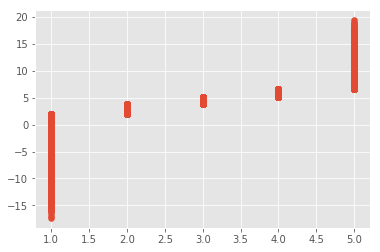

In [24]:
#Scatterplot set_stars vs. norm_score
plt.scatter(Yelp_new_rating['set_stars'], Yelp_new_rating['norm_score'])

In [ ]:
#Compare to Afinn module Wsubset - row 3 has the same sentence as row 2 repeated. Normalization reduces the difference
#in score between the two, but the difference is still relatively high. Calculating the mean in this case would
#be better, but may not be beneficial for other case scenarios. Stick with sum/sqr(N) for normalization?
#Or try calculating mean as well?

In [ ]:
#Run analyses below with this data and actual user star data
#1.Test train data with KNN
#2.Redo normalization using mean instead of sqrt(n) and test train data
#3.Perform linear regression on this data